### シグモイド関数

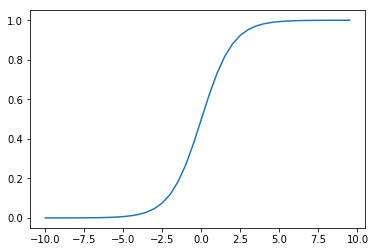

In [102]:
import numpy as np
import math
import matplotlib.pyplot as plt

def sigmoid(z):
    e = math.e
    
    g = 1 / (1 + e**-z)
    
    return g

z = np.arange(-10, 10, 0.5)

g = sigmoid(z)

plt.plot(z, g)
plt.show()

# 【問題1】ロジスティック回帰のクラスを作成する
- ロジスティック回帰で使用する数式を意識すべきところは理解を深めるために愚直にかく
- それ以外はライブラリを頼る  
 from IPython.core.debugger import Pdb; Pdb().set_trace()

In [168]:
#import sys                                                         # ライブラリまでのディレクトリ定義
#sys.path.append('../ml-scratch/utils')
#import const　　　　                                                 # 定数に代入すると怒るやつ
import math
import numpy as np
import pandas as pd

class ScratchLogisticRegression():
    """
    ロジスティック回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    """
    
    # ネイピア数を定数定義(クラス内定数定義を試してみたかった .pyにしたら使うかも)
    # const.E = math.e
    
    def __init__(self, num_iter=500, lr=0.0001, c=0.0001, no_bias=False, verbose=False):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.c = c
        self.no_bias = no_bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        self.coef_ = 0
        self.intercept_ = 0

    def fit(self, X, y, X_val=None, y_val=None):
        """
        ロジスティック回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

          Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        
        # 次元数を必要に応じて追加
        if X.ndim < 2:
            X = X[:, np.newaxis]
        if y.ndim < 2:
            y = y[:, np.newaxis]
            
        # バイアス入れないフラグが立っていない場合は、バイアス項を1で先頭列に挿入
        if self.no_bias is False:
            X = np.hstack((np.ones(len(X))[:, np.newaxis], X))
            
        # パラメータを列数に応じて乱数で初期化
        self.coef_ =  np.random.rand(X.shape[1])
        
        for i in range(self.iter):
            # 仮定関数コール
            y_hat = self._logistic_regression_hypothesis(X)
            
            # 誤差を算出
            error =  y_hat - y
            
            # 誤差を格納
            self.loss[i] = cost_func(y, y_hat, self.coef_)
            print(self.loss[i])
            
            # 最急降下法関数コール
            self._gradient_descent(X, error)

            
        # バイアス入れないフラグが立っていない場合は、バイアスのthetaをintercept_に入れる
        if self.no_bias is False:
            self.intercept_ = self.coef_[0]


    def _logistic_regression_hypothesis(self, X):
        """
        ロジスティック回帰の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          学習データ

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果

        """
        
        #  シグモイド
        y_hat = 1 / (1 + math.e**-np.dot(X, self.coef_[:, np.newaxis]))
        # expを使うと正確に出る？↑
        # →np.exp....()を調べる
        return y_hat
        
    
    def _gradient_descent(self, X, error):
        """
        説明を記述
        """
        
        # バイアス入れないフラグが立っていない場合は、式を分ける
        if self.no_bias is False:
            # self.coef_[0] = バイアス項のパラメータなので、正則化を入れない
            self.coef_[0]  -= self.lr * np.sum(np.dot(error.T, X[:, 0])) / len(X)
            self.coef_[1:] -= (self.lr * np.sum(np.dot(error.T, X[:, 1:])) / len(X)) + ((self.c * self.coef_[1:]) / len(X))
        else:
            # パラメータ更新
            self.coef_ -= (self.lr * np.sum(np.dot(error.T, X)) / len(X)) + ((self.c * self.coef_) / len(X))
            
            
    def predict_proba(self, X):
        """
        ロジスティック回帰回帰を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        
        y_pred = np.dot(X, self.coef_[:, np.newaxis])
        
        return y_pred


    def predict_proba(self, X):
        """
        ロジスティック回帰回帰を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        
        y_pred = np.dot(X, self.coef_[:, np.newaxis])
        
        return y_pred

In [169]:
def cost_func(y_true, y_pred, coef, c=0.1):
    return np.sum(((-y_true * np.log(y_pred) - ((1 - y_true) *  np.log(1 - y_pred)))/ len(y_true)) +  (np.sum(c * coef**2) / (2*len(y_true))))

In [170]:
import math
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd

iris = load_iris()

df1 = pd.DataFrame(
    iris.data, 
    columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
)

df2 =  pd.DataFrame(iris.target, columns = ['species'])

df = pd.concat([df1, df2], axis=1)

df = df[:100]

X =df[['petal_length', 'petal_width']]

y = df['species']

slr = ScratchLogisticRegression()
slr.fit(X, y)
print(slr.coef_)
print(slr.intercept_)

0.8379724397277237
0.8379091860541031
0.8378459401861166
0.8377827021242268
0.8377194718688964
0.837656249420588
0.8375930347797634
0.8375298279468852
0.837466628922415
0.8374034377068149
0.8373402543005464
0.8372770787040713
0.8372139109178511
0.8371507509423469
0.8370875987780202
0.8370244544253321
0.8369613178847432
0.8368981891567147
0.8368350682417074
0.8367719551401817
0.8367088498525973
0.8366457523794159
0.8365826627210966
0.8365195808781001
0.8364565068508859
0.8363934406399139
0.8363303822456442
0.8362673316685354
0.8362042889090479
0.8361412539676405
0.836078226844772
0.8360152075409023
0.8359521960564893
0.8358891923919923
0.83582619654787
0.8357632085245804
0.8357002283225824
0.8356372559423341
0.8355742913842932
0.835511334648918
0.8354483857366664
0.8353854446479958
0.8353225113833638
0.8352595859432279
0.8351966683280454
0.8351337585382738
0.8350708565743699
0.83500796243679
0.8349450761259917
0.8348821976424313
0.8348193269865652
0.8347564641588501
0.8346936091597419
0